# Breast Cancer Dataset EDA and Machine Learning

In [1]:
# import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import janitor

In [3]:
# load breast cancer data
df = (pd.read_csv("./Breast_Cancer.csv")
        .clean_names()
        .dropna())

## Initial data cleanup

In [3]:
# Check if there are missing values
df.isnull().sum()

age                       0
race                      0
marital_status            0
t_stage_                  0
n_stage                   0
6th_stage                 0
differentiate             0
grade                     0
a_stage                   0
tumor_size                0
estrogen_status           0
progesterone_status       0
regional_node_examined    0
reginol_node_positive     0
survival_months           0
status                    0
dtype: int64

In [4]:
print(df.columns.tolist())

['age', 'race', 'marital_status', 't_stage_', 'n_stage', '6th_stage', 'differentiate', 'grade', 'a_stage', 'tumor_size', 'estrogen_status', 'progesterone_status', 'regional_node_examined', 'reginol_node_positive', 'survival_months', 'status']


The average age of women in this dataset is ~54 years old. Breast cancer patients tend to be in older age groups but it is not 
uncommon to see women with breast cancer in their late 30s or 40s as we see in this dataset.

Age Statistics
count    4024.000000
mean       53.972167
std         8.963134
min        30.000000
25%        47.000000
50%        54.000000
75%        61.000000
max        69.000000
Name: age, dtype: float64


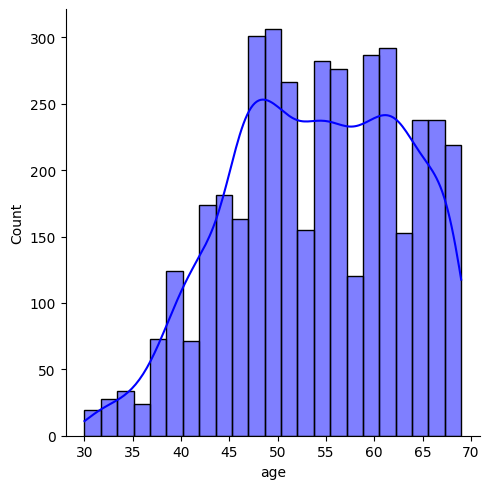

In [6]:
# Histogram of ages
sns.displot(data=df, x="age", kind="hist", kde = True, color="blue")
print("Age Statistics")
print(df["age"].describe())


<AxesSubplot: xlabel='age'>

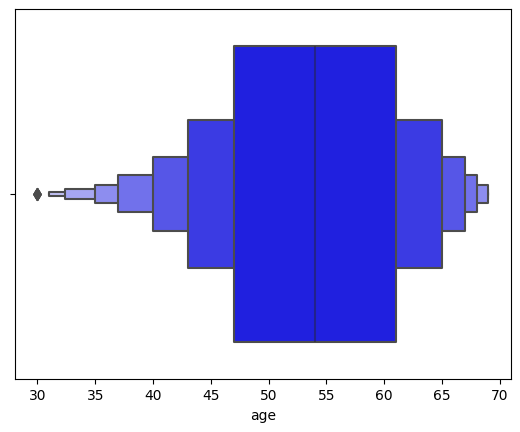

In [7]:
# Boxenplot of ages
sns.boxenplot(data=df, x="age", color='blue')

## Exploratory Data Analysis (EDA)

In [5]:
# initial subsetted dataframe by n-stage and status
df_status = df.groupby(by=["n_stage", "status"])["status"].count().unstack()
print(df_status)

status   Alive  Dead
n_stage             
N1        2462   270
N2         655   165
N3         291   181


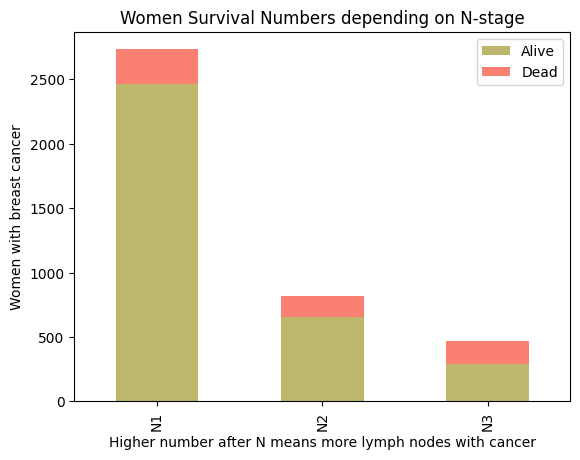

In [10]:
# build plot
labels = ['n1', 'n2', 'n3']
xlab = 'Higher number after N means more lymph nodes with cancer'
ylab = 'Women with breast cancer'


df_status.plot(kind="bar", stacked ='True', color=['darkkhaki', 'salmon'])
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.legend(['Alive', 'Dead'])
plt.title('Women Survival Numbers depending on N-stage')
plt.show()

We see that women that have more lymph nodes affected by cancer (Stage N3) are passing away at a greater rate compared
to those with less lymph nodes affected (Stage N2 and N1)

status   percent_alive  percent_dead
n_stage                             
N1                90.1           9.9
N2                79.9          20.1
N3                61.7          38.3


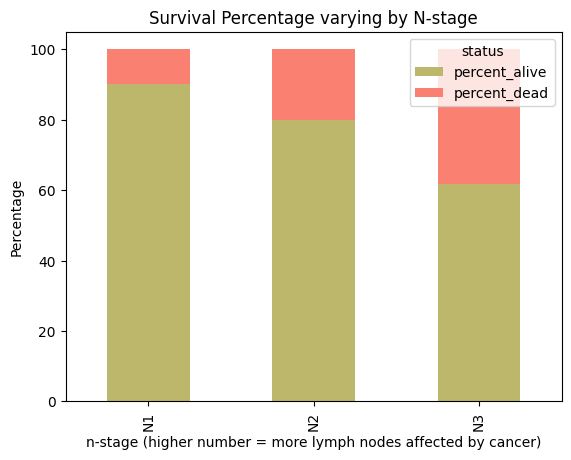

In [11]:
# Stacked Bar Percentage Visualization n-stage vs survival
df_status["percent_alive"] = round(df_status["Alive"] / df_status.iloc[:,0:2].sum(axis=1) * 100, 1)
df_status["percent_dead"] = round(df_status["Dead"] / df_status.iloc[:,0:2].sum(axis=1) * 100, 1)

print(df_status[["percent_alive", "percent_dead"]])
df_status[["percent_alive", "percent_dead"]].plot(
  kind ='bar',
  stacked=True,
  color=['darkkhaki', 'salmon'],
  title = "Survival Percentage varying by N-stage")

plt.xlabel('n-stage (higher number = more lymph nodes affected by cancer)')
plt.ylabel('Percentage')
plt.show()

The higher the T stage the bigger the tumor size. We see a negative relationship between tumor size and survival rate.

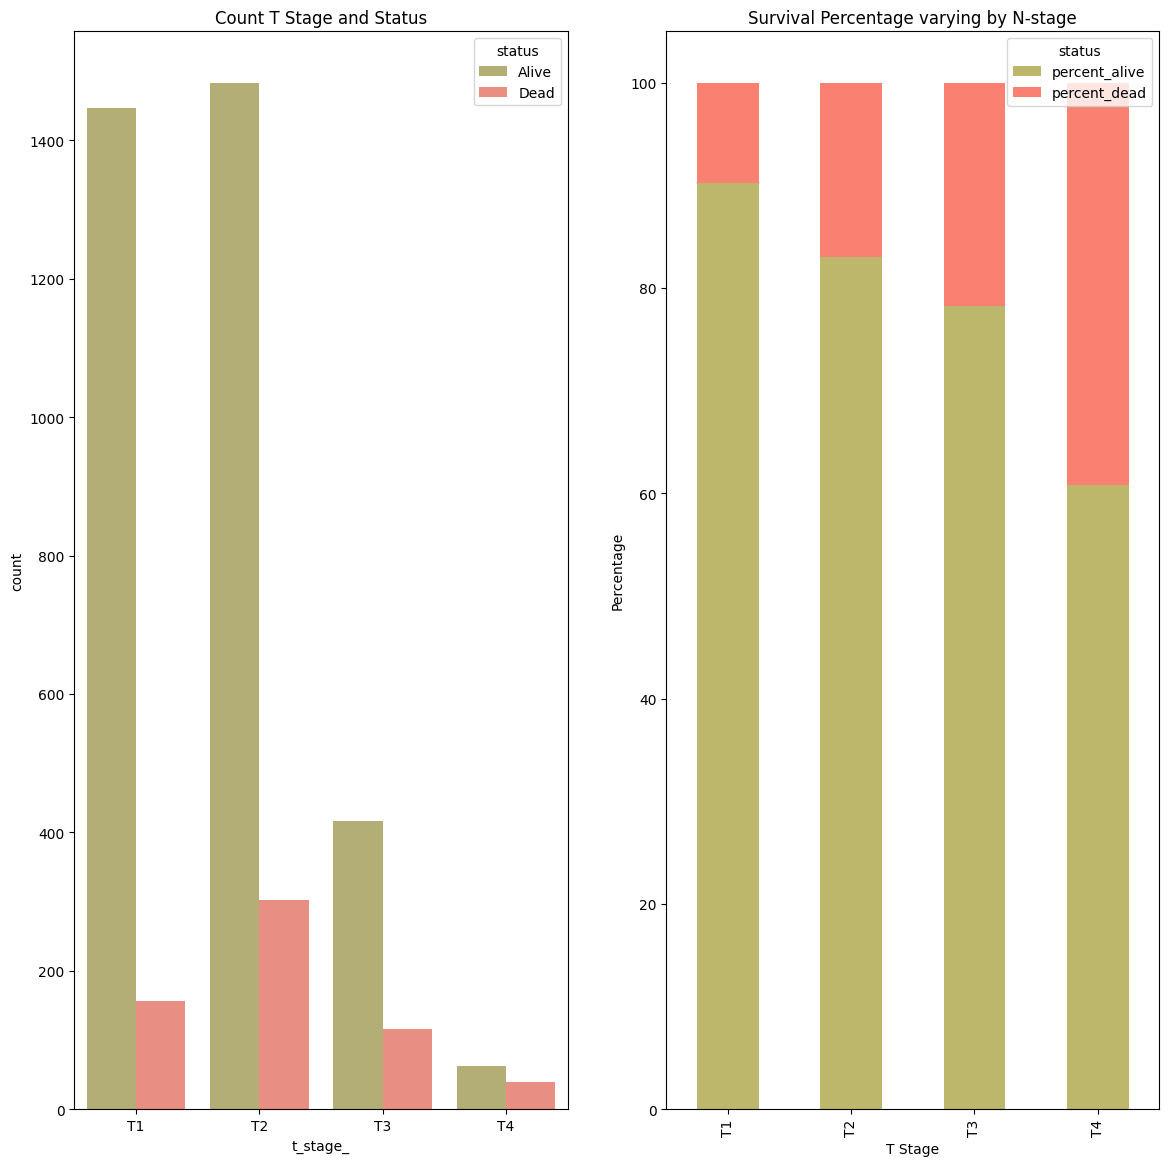

In [13]:
# intial t-stage dataframe calculations
df_tstage = df.groupby(by=["t_stage_", "status"])["status"].count().unstack()
df_tstage["percent_alive"] = round(df_tstage["Alive"] / df_tstage.iloc[:,0:2].sum(axis=1) * 100, 1)
df_tstage["percent_dead"] = round(df_tstage["Dead"] / df_tstage.iloc[:,0:2].sum(axis=1) * 100, 1)

# countplot of t-stage 
f, axes = plt.subplots(1, 2, figsize=(14,14))
sns.countplot(data=df, x="t_stage_", hue="status", palette=['darkkhaki', 'salmon'], ax=axes[0]).set(title="Count T Stage and Status")

# percentage bar plot
df_tstage[["percent_alive", "percent_dead"]].plot(
  kind ='bar',
  stacked=True,
  color=['darkkhaki', 'salmon'],
  ax=axes[1],
  title = "Survival Percentage varying by N-stage")

plt.xlabel('T Stage')
plt.ylabel('Percentage')
plt.show()

IIBB and IIB are earlier stages of breast cancer while IIA, IIAA and IIIC are later stages of breast cancer
where IIIC is the latest stage. IIIC patients have tumors spread to 10 or more lymph nodes. As expected a significant portion
of patients at the IIIC stage did not make it. The survival rate for IIB, IIIB, IIA, IIIA is higher.

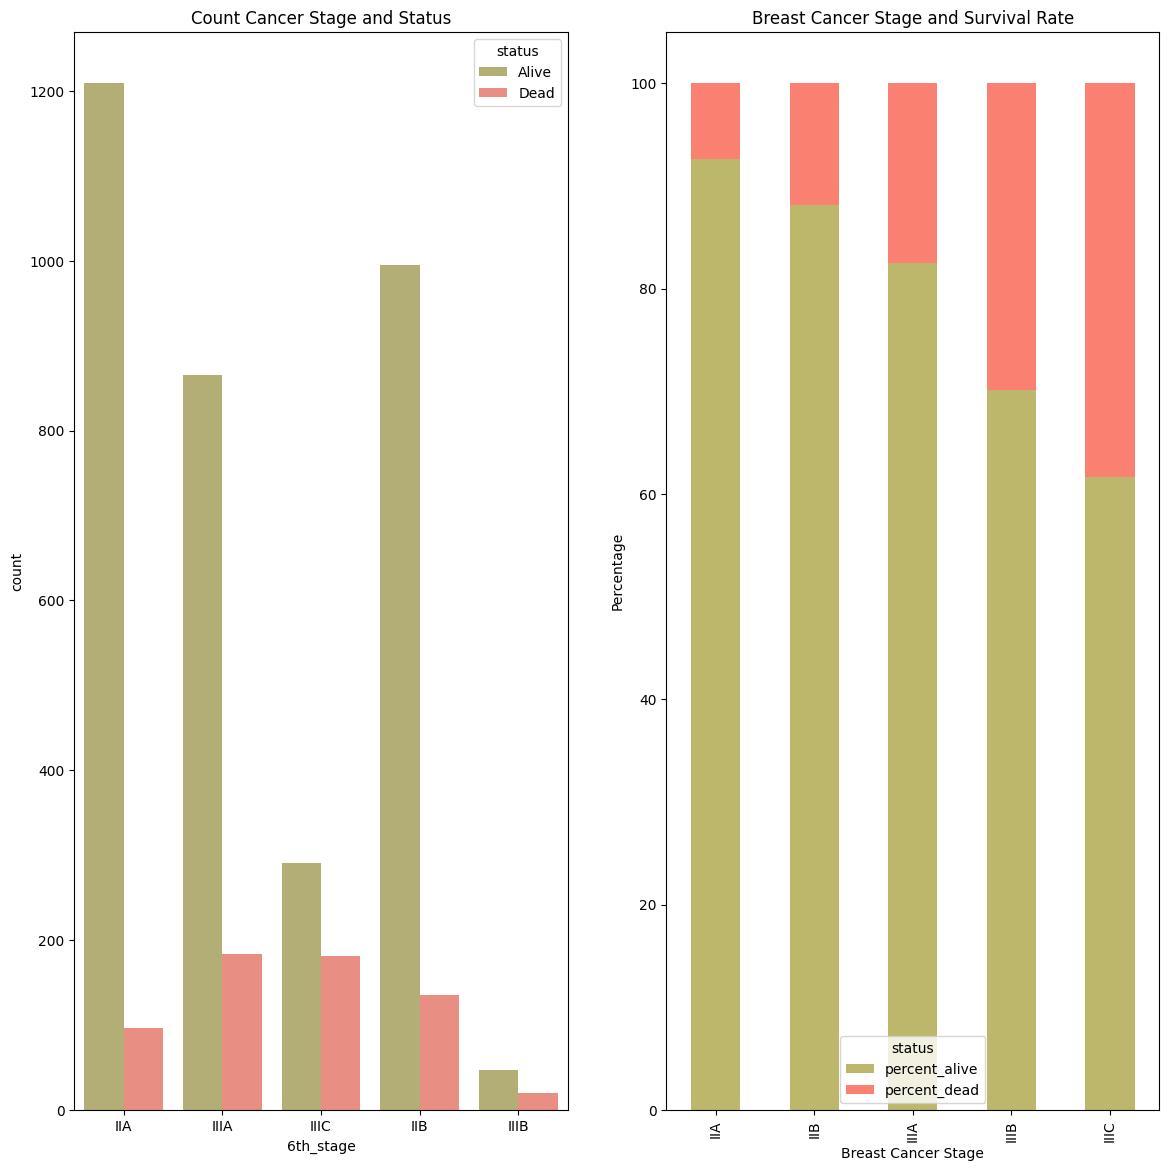

In [14]:
# intial 6-stage dataframe calculations
df_6stage = df.groupby(by=["6th_stage", "status"])["status"].count().unstack()
df_6stage["percent_alive"] = round(df_6stage["Alive"] / df_6stage.iloc[:,0:2].sum(axis=1) * 100, 1)
df_6stage["percent_dead"] = round(df_6stage["Dead"] / df_6stage.iloc[:,0:2].sum(axis=1) * 100, 1)

f, axes = plt.subplots(1, 2, figsize=(14,14))
sns.countplot(data=df, x="6th_stage", hue="status", ax=axes[0], palette=[
              'darkkhaki', 'salmon']).set(title="Count Cancer Stage and Status")

df_6stage[["percent_alive", "percent_dead"]].plot(
    kind="bar",
    ax=axes[1],
    color=['darkkhaki', 'salmon'],
    title="Breast Cancer Stage and Survival Rate",
    stacked=True,
    xlabel="Breast Cancer Stage",
    ylabel="Percentage"
)
plt.show()

Married women have slightly better rates of survival than single, divorced, and widowed women. There is some relationship 
between having a significant other (family/husband) than not having one, but more data and variables are needed to prove
this.

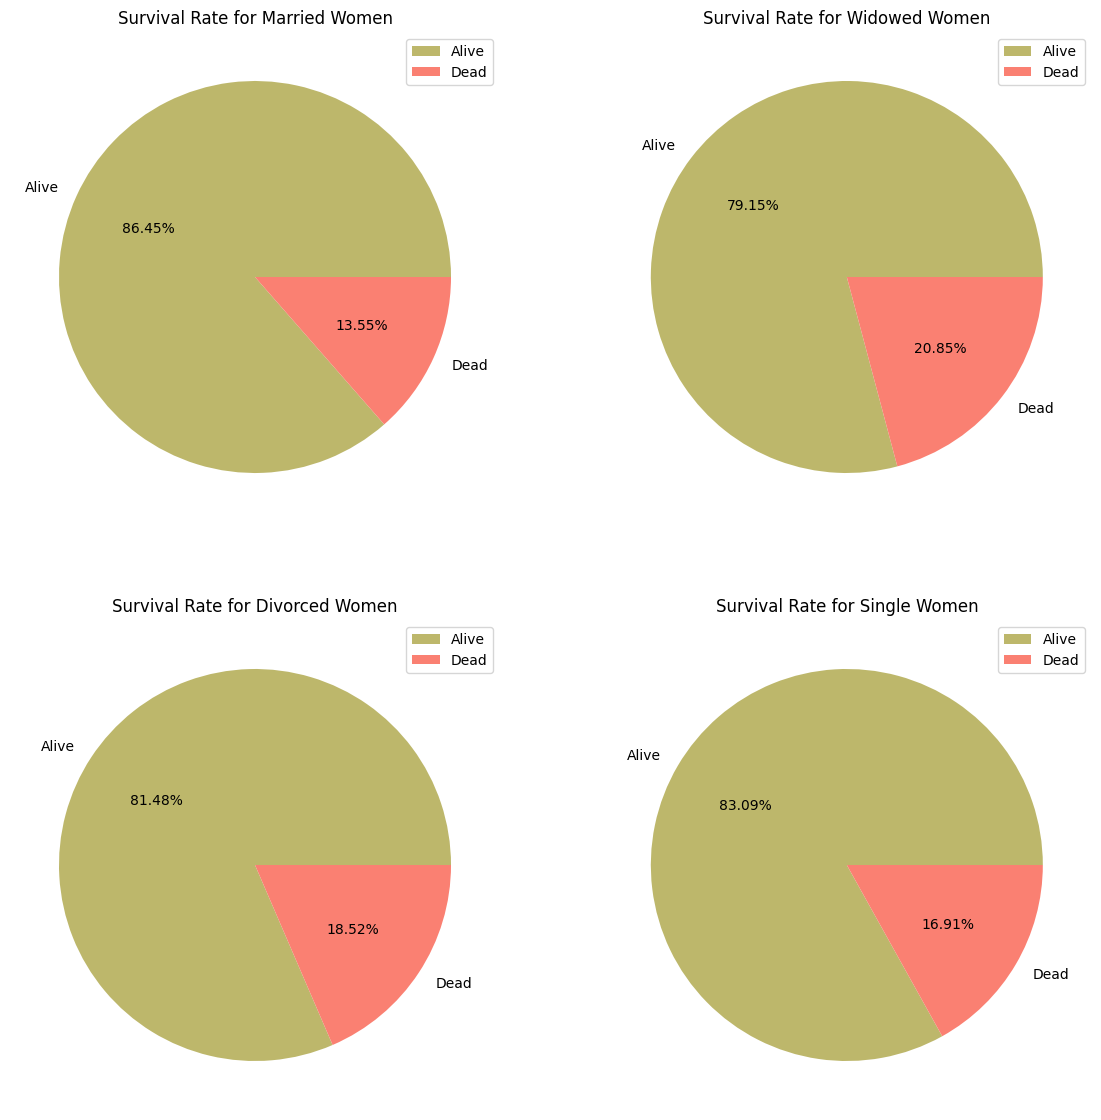

In [15]:
df_married = df.loc[df["marital_status"] == "Married", ["marital_status", "status"]].groupby(by=["status"]).count()
df_divorced = df.loc[df["marital_status"] == "Divorced", ["marital_status", "status"]].groupby(by=["status"]).count()
df_widow = df.loc[df["marital_status"] == "Widowed", ["marital_status", "status"]].groupby(by=["status"]).count()
df_single = df.loc[df["marital_status"] == "Single ", ["marital_status", "status"]].groupby(by=["status"]).count()

fpie, axes = plt.subplots(2, 2, figsize=(14,14))

df_married.plot.pie(
    y = "marital_status",
    autopct = "%.2f%%",
    ax = axes[0, 0],
    colors=['darkkhaki', 'salmon'],
    ylabel = '',
    title = 'Survival Rate for Married Women')

df_divorced.plot.pie(
    y = "marital_status",
    autopct = "%.2f%%",
    ax = axes[1,0],
    colors=['darkkhaki', 'salmon'],
    ylabel = '',
    title = 'Survival Rate for Divorced Women')

df_widow.plot.pie(
    y = "marital_status",
    autopct = "%.2f%%",
    ax = axes[0, 1],
    colors = ['darkkhaki', 'salmon'],
    ylabel = '',
    title = 'Survival Rate for Widowed Women')

df_single.plot.pie(
    y = "marital_status",
    autopct = "%.2f%%",
    ax = axes[1, 1],
    colors = ['darkkhaki', 'salmon'],
    ylabel = '',
    title = 'Survival Rate for Single Women')

plt.show()

Those who passed away had on average larger tumor sizes with higher 25% and 75% percentiles.

count    3408.000000
mean       29.268779
std        20.303175
min         1.000000
25%        15.000000
50%        23.000000
75%        35.000000
max       140.000000
Name: tumor_size, dtype: float64

count    616.000000
mean      37.139610
std       24.116115
min        1.000000
25%       20.000000
50%       30.000000
75%       50.000000
max      140.000000
Name: tumor_size, dtype: float64


<AxesSubplot: xlabel='tumor_size', ylabel='status'>

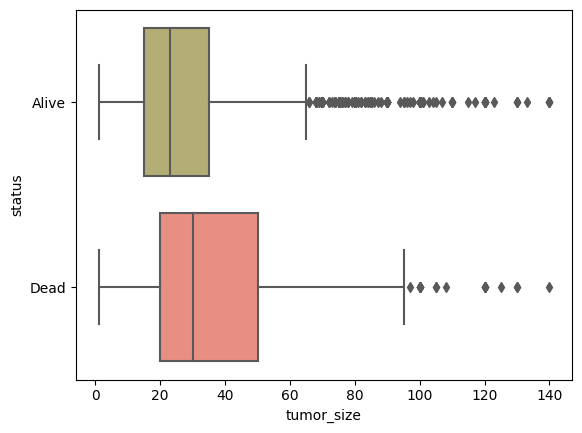

In [16]:
print(df.loc[df["status"] == "Alive"]["tumor_size"].describe())
print()
print(df.loc[df["status"] == "Dead"]["tumor_size"].describe())

sns.boxplot(x=df["tumor_size"], y=df["status"],
            palette=['darkkhaki', 'salmon'])

## Regressions / Machine Learning

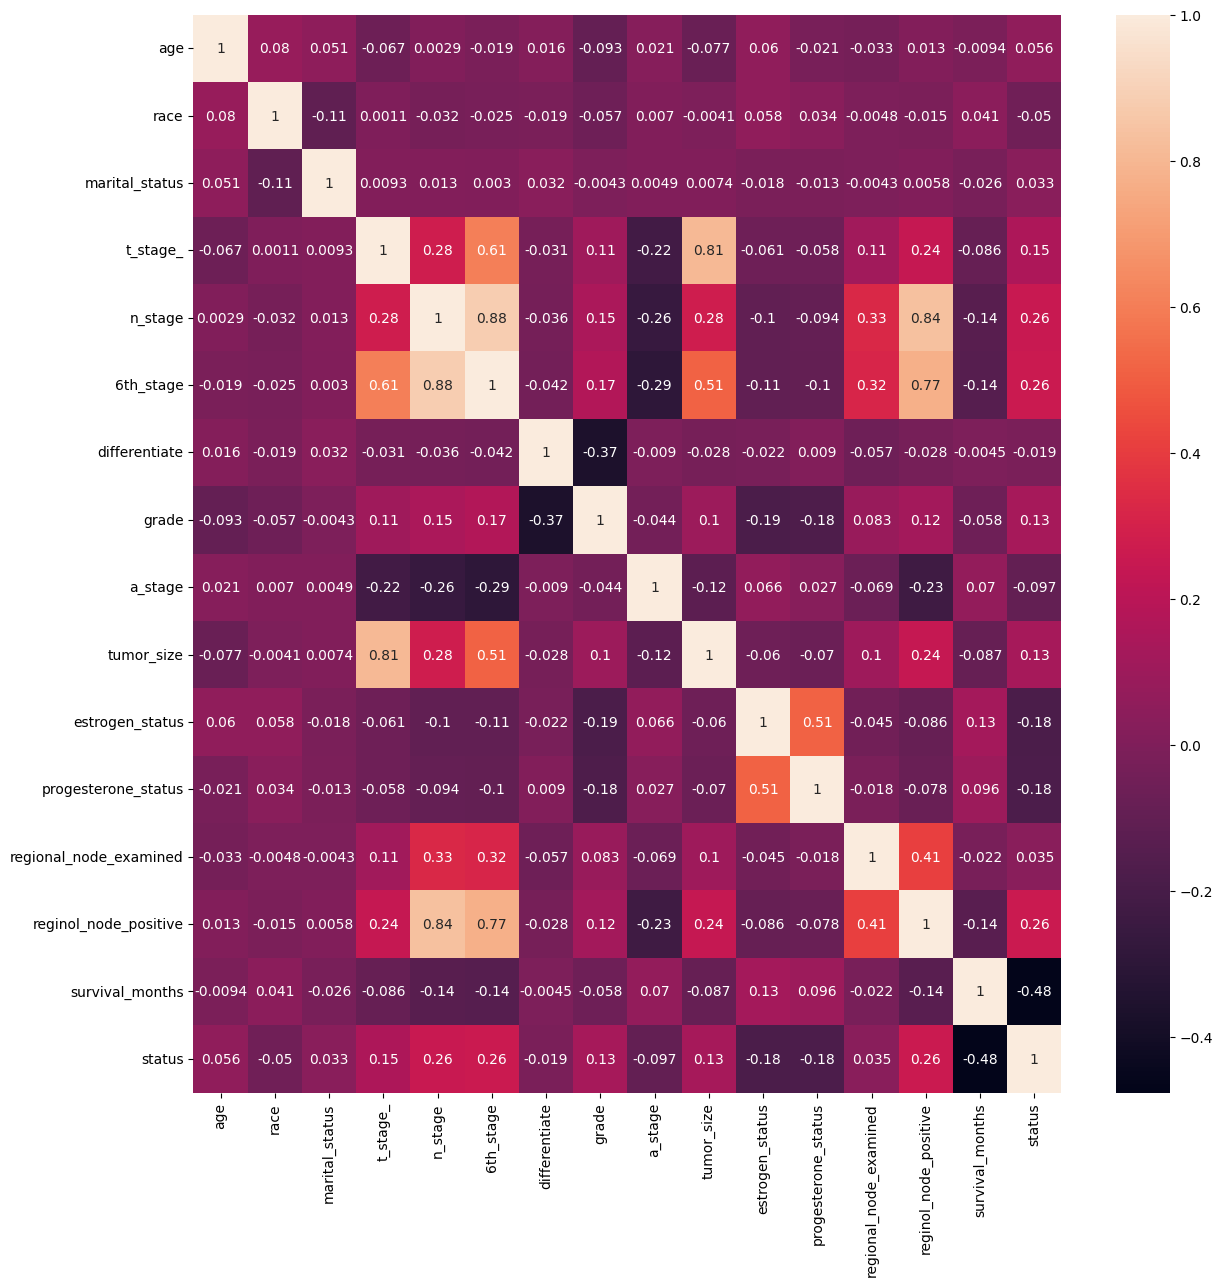

In [58]:
from sklearn.preprocessing import LabelEncoder

# array of categorical variables
categories = df.select_dtypes(include='object').columns

# Convert categorical variables to dummy variables in original df
df[categories] = df[categories].apply(LabelEncoder().fit_transform)

plt.figure(figsize = (14,14))
sns.heatmap(df.corr(), annot=True, cmap='rocket')
plt.show()

T-stage, N-stage, 6th-stage, and reginol_node_positive categorical variables have high correlation to each other. However,
cancer stages or more less correlate with tumor size.

### Does cancer stage serve as a good predictor of tumor size?

**Answer**: Despite categorical variables (n_stage, t_stage, and 6th stage) being more correlated to tumor size compared 
to other variables, the linear regression only explained about 69% of the variance of the tumor size data.
There may be other variables (patients receiving cancer treatment) or the phenomena of the cancer cells themselves 
that could contribute to tumor size, but further data and research is needed. 

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

response = "tumor_size"
regressors = ["n_stage", "t_stage_", "6th_stage"]

X = df[regressors]
y = df[response]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

lm = LinearRegression()

lm.fit(X_train, y_train)

print("R2 = %.4f" % lm.score(X_test, y_test))
pd.DataFrame(lm.coef_.reshape(1,-1), columns=X.columns)


R2 = 0.6879


,n_stage,t_stage_,6th_stage
0,7.964025,24.530937,-4.355343


### Question: Does tumor size and cancer stages affect survival months?

**Answer**: No, the regression performed very poorly. This is no surprise
as there is no fields in the dataset that supports whether or not a cancer patient received treatment or underwent
surgery which significantly impacts survival rate and time.

In [60]:
response = "survival_months"
regressors = ["tumor_size", "n_stage", "t_stage_", "6th_stage"]

X = df[regressors]
y = df[response]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

lm.fit(X_train, y_train)

print("R2 = %0.4f" % lm.score(X_test, y_test))
pd.DataFrame(lm.coef_.reshape(1,-1), columns=X.columns)

R2 = 0.0173


,tumor_size,n_stage,t_stage_,6th_stage
0,-0.026422,-2.549193,-0.952111,-0.865843


### Question: Can the variables provided in the breast cancer dataset predict patient survival status?

**Answer**: Yes, by using logistic regression we were able predict patient survival status on cross-validated test data
with an R2 of ~0.90. However, Lasso and Ridge regression had poor prediction performance mainly due to almost all regressors
being shrunk to zero. This indicates there is not a linear combination of regressors using Lasso/Ridge regression that can predict patient survival
status.


In [61]:
from sklearn.linear_model import LogisticRegression

response = "status"
regressors = df.drop(response, axis=1).columns

X = df[regressors]
y = df[response]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

log_model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
cv_score = cross_val_score(log_model, X, y, cv = 5)

print(f"Score: {log_model.score(X_test, y_test):.4f}")
print("CV scores:", cv_score.round(4))
pd.DataFrame(log_model.coef_, columns=X_train.columns)

Score: 0.8887
CV scores: [0.8981 0.8919 0.887  0.9168 0.8893]


,age,race,marital_status,t_stage_,n_stage,6th_stage,differentiate,grade,a_stage,tumor_size,estrogen_status,progesterone_status,regional_node_examined,reginol_node_positive,survival_months
0,0.027589,-0.174755,-0.01006,0.730198,0.421848,-0.191923,-0.051178,0.40198,0.200916,-0.009725,-0.524582,-0.50985,-0.035088,0.095891,-0.06214


In [44]:
from sklearn.linear_model import Lasso, Ridge

X = df[regressors]
y = df[response]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

ridge_model = Ridge().fit(X_train, y_train)
cv_score = cross_val_score(ridge_model, X, y, cv = 5)

print("Score: %.4f" % ridge_model.score(X_test, y_test))
print("CV scores:", cv_score.round(4))
pd.DataFrame(ridge_model.coef_, index=X.columns)

Score: 0.2836
CV scores: [0.2979 0.3165 0.2652 0.3303 0.2483]


,0
age,0.002344
race,-0.016256
marital_status,-0.000162
t_stage_,0.084373
n_stage,0.062653
6th_stage,-0.039056
differentiate,0.000412
grade,0.036542
a_stage,0.008070
tumor_size,-0.001102
